# Natural Language Processing 
# E63 Big Data Analytics: Assignment 7
**Harvard University**<br>
**Spring 2017**<br>


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from nltk.text import Text 
from nltk import FreqDist
from nltk.corpus import wordnet as wn
import nltk
import re

from nltk.corpus import inaugural
from collections import Counter

from nltk import CFG
from nltk.tree import Tree

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## ** Problem 1. Create a table displaying relative frequencies with which “modals” (can, could, may, might, will, would and should) are used in 18 texts provided by NLTK in the extract from Gutenberg Corpus.**

In [3]:
# Print the name of all the gutenberg books
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [4]:
modals = ["can","could", "may", "might", "will", "would" , "should"]

In [5]:
print 'Number of books in gutenberg corpus: ',len(nltk.corpus.gutenberg.fileids())
print 'Number of modals: ',len(modals)

Number of books in gutenberg corpus:  18
Number of modals:  7


## ** Create a table displaying relative frequencies with which “modals” (can, could, may, might, will, would and should) are used in 18 texts provided by NLTK in the extract from Gutenberg Corpus **

In [6]:
all_series = []
for book in nltk.corpus.gutenberg.fileids():
    
    md2 = nltk.corpus.gutenberg.words(book) # loading all the words from all the texts in gutenberg corpus
    fd2 = nltk.FreqDist(m.lower() for m in md2) # frequency of all the words in all the gutenberg texts
    l=[]
    for m in modals:
        l.append(fd2.freq(m) * 100) # relative frequency of each modal
        max_val, max_idx = max((max_val, max_idx) for (max_idx, max_val) in enumerate(l)) # most used modal
        min_val, min_idx = min((min_val, min_idx) for (min_idx, min_val) in enumerate(l)) # least used modal
        
    most_least_used = [modals[max_idx], max_val, modals[min_idx],min_val]
    series = np.append(most_least_used,book)
    all_series.append(series)

    #Create a tabular format
data_frame =  pd.DataFrame(all_series) 
data_frame.columns = ['Most used', 'Relative frequencies', 'Least used', 'Relative frequencies','Book']
data_frame

,Most used,Relative frequencies,Least used,Relative frequencies,Book
0,could,0.434970144522,may,0.114848747837,austen-emma.txt
1,could,0.459402471198,may,0.0886208758187,austen-persuasion.txt
2,could,0.408261287224,may,0.123608521218,austen-sense.txt
3,will,0.379556208158,could,0.0164250079651,bible-kjv.txt
4,can,0.335168781422,might,0.0239406272444,blake-poems.txt
5,could,0.284361895506,may,0.039594694311,bryant-stories.txt
6,could,0.295311923219,may,0.015820281601,burgess-busterbrown.txt
7,would,0.243330401642,may,0.0381119906186,carroll-alice.txt
8,will,0.209286980906,might,0.0742298651491,chesterton-ball.txt
9,could,0.198691656112,may,0.0557730964526,chesterton-brown.txt


## ** Find the most used modal and the least used modal in every examined text. **

In [7]:
all_series = []
for book in nltk.corpus.gutenberg.fileids():
    
    md2 = nltk.corpus.gutenberg.words(book) # loading all the words from all the texts in gutenberg corpus
    fd2 = nltk.FreqDist(m.lower() for m in md2) # frequency of all the words in all the gutenberg texts
    l=[]
    for m in modals:
        l.append(fd2[m])
        max_val, max_idx = max((max_val, max_idx) for (max_idx, max_val) in enumerate(l))
        min_val, min_idx = min((min_val, min_idx) for (min_idx, min_val) in enumerate(l))
        
    most_least_used = [modals[max_idx], max_val, modals[min_idx],min_val]
    series = np.append(most_least_used,book)
    all_series.append(series)
    
    
data_frame =  pd.DataFrame(all_series) 
data_frame.columns = ['Most used', 'Value', 'Least used', 'Value','Book']
data_frame

,Most used,Value,Least used,Value,Book
0,could,837,may,221,austen-emma.txt
1,could,451,may,87,austen-persuasion.txt
2,could,578,may,175,austen-sense.txt
3,will,3836,could,166,bible-kjv.txt
4,can,28,might,2,blake-poems.txt
5,could,158,may,22,bryant-stories.txt
6,could,56,may,3,burgess-busterbrown.txt
7,would,83,may,13,carroll-alice.txt
8,will,203,might,72,chesterton-ball.txt
9,could,171,may,48,chesterton-brown.txt


## ** Select two text which use previously identified most frequently used modals the most. Compare usage in both texts by examining the concordances of that  modals. **

** From the above text, it can be seen that 'will' is used 3836 times in bible-kjv.txt
While 'could' is used 837 times in austen-emma.txt**


In [8]:
text1 = Text(nltk.corpus.gutenberg.words('bible-kjv.txt'))
text2 = Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

In [9]:
text1.concordance("will")

Displaying 25 of 3836 matches:
ood that the man should be alone ; I will make him an help meet for him . 2 : 
 the days of thy life : 3 : 15 And I will put enmity between thee and the woma
 . 3 : 16 Unto the woman he said , I will greatly multiply thy sorrow and thy 
 heart . 6 : 7 And the LORD said , I will destroy man whom I have created from
ence through them ; and , behold , I will destroy them with the earth . 6 : 14
rth shall die . 6 : 18 But with thee will I establish my covenant ; and thou s
h . 7 : 4 For yet seven days , and I will cause it to rain upon the earth fort
ry living substance that I have made will I destroy from off the face of the e
; and the LORD said in his heart , I will not again curse the ground any more 
art is evil from his youth ; neither will I again smite any more every thing l
 And surely your blood of your lives will I require ; at the hand of every bea
require ; at the hand of every beast will I require it , and at the hand of ma
at the hand of every 

** 'will' is most of the times preceded by pronoun 'I' and is used to describe  power,control**

In [10]:
text1.concordance("could")

Displaying 25 of 166 matches:
r substance was great , so that they could not dwell together . 13 : 7 And ther
, and his eyes were dim , so that he could not see , he called Esau his eldest 
the land wherein they were strangers could not bear them because of their cattl
 his brethren , they hated him , and could not speak peaceably unto him . 37 : 
 his dream ; but there was none that could interpret them unto Pharaoh . 41 : 9
And when they had eaten them up , it could not be known that they had eaten the
 magicians ; but there was none that could declare it to me . 41 : 25 And Josep
ording to the tenor of these words : could we certainly know that he would say 
me on my father . 45 : 1 Then Joseph could not refrain himself before all them 
y father yet live ? And his brethren could not answer him ; for they were troub
Israel were dim for age , so that he could not see . And he brought them near u
im three months . 2 : 3 And when she could not longer hide him , she took for h
 the river

** 'could' is most of the times followed by 'not' **

In [11]:
text1 = Text(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
text2 = Text(nltk.corpus.gutenberg.words('whitman-leaves.txt'))

In [12]:
text1.concordance("will")

Displaying 25 of 72 matches:
ttaile ' s lost , and wonne 3 . That will be ere the set of Sunne 1 . Where th
des of Time , And say , which Graine will grow , and which will not , Speake t
, which Graine will grow , and which will not , Speake then to me , who neythe
ur Partner ' s rapt Macb . If Chance will haue me King , Why Chance may Crowne
r : I haue begun to plant thee , and will labour To make thee full of growing 
e places are the nearest , know , We will establish our Estate vpon Our eldest
igne sway , and Masterdome Macb . We will speake further , Lady . Onely looke 
 his great Office , that his Vertues Will pleade like Angels , Trumpet - tongu
 Know you not , he ha ' s ? Mac . We will proceed no further in this Businesse
y inuite him ) his two Chamberlaines Will I with Wine , and Wassell , so conui
e should compose Nothing but Males . Will it not be receiu ' d , When we haue 
ntent Mac . Being vnprepar ' d , Our will became the seruant to defect , Which
 thought After these wa

** 'will' is used in various context with different noun or with 'We' **

In [13]:
text2.concordance("will")

Displaying 25 of 273 matches:
ght , By sailors young and old haply will I , a reminiscence of the land , be 
gh time was really fought , and ever will be really fought , for thee ,) These
author calls a man ' s life ? And so will some one when I am dead and gone wri
ellect , But you ye untold latencies will thrill to every page . } Poets to Co
longer than water ebbs and flows . I will make the poems of materials , for I 
 be the most spiritual poems , And I will make the poems of my body and of mor
ms of my soul and of immortality . I will make a song for these States that no
e subjected to another State , And I will make a song that there shall be comi
 and between any two of them , And I will make a song for the ears of the Pres
 any else that head is over all .) I will acknowledge contemporary lands , I w
l acknowledge contemporary lands , I will trail the whole geography of the glo
arge and small , And employments ! I will put in my poems that with you is her
is heroism upon land a

** 'will' is mostly preceded with pronoun 'I' **

## ** Problem 2. In the Inaugural corpus identify 10 most frequently used words longer than 7 characters. **

In [14]:
# load all the words from inaugural corpus books
words1 = nltk.corpus.inaugural.words(nltk.corpus.inaugural.fileids())

#filter out words which have lenght greated than 7
char = ([w.lower() for w in words1 if len(w) > 7 ])

#find its freq-distribution and find the top 10 words
fdist1 = FreqDist(char)
f = fdist1.most_common(10)


In [15]:
# Separate the words and values and create a dataframe
val1 = []
for i in range(10):
    val1.append(f[i][0])
val2 = []
for j in range(10):
    val2.append(f[j][1])
d = {'Top 10 words': val1, 'Total occurrences': val2}
df = pd.DataFrame(d)
df

,Top 10 words,Total occurrences
0,government,593
1,citizens,237
2,constitution,205
3,national,154
4,american,147
5,congress,129
6,interests,113
7,political,106
8,executive,97
9,principles,93


## ** List all synonyms for those 10 words. **

In [16]:
synoymn = []
for top_words in fdist1.most_common(10):
    print 'The word is ',top_words[0]
    count=0
    print 'Its synonymns are: '
    for words in wn.synsets(top_words[0]):
        # print  words
        print '  ',words.lemma_names()
        count+=len(words.lemma_names())
    synoymn.append([top_words[0],count])
         

The word is  government
Its synonymns are: 
   [u'government', u'authorities', u'regime']
   [u'government', u'governing', u'governance', u'government_activity', u'administration']
   [u'government']
   [u'politics', u'political_science', u'government']
The word is  citizens
Its synonymns are: 
   [u'citizen']
The word is  constitution
Its synonymns are: 
   [u'fundamental_law', u'organic_law', u'constitution']
   [u'constitution', u'establishment', u'formation', u'organization', u'organisation']
   [u'United_States_Constitution', u'U.S._Constitution', u'US_Constitution', u'Constitution', u'Constitution_of_the_United_States']
   [u'constitution', u'composition', u'physical_composition', u'makeup', u'make-up']
   [u'Constitution', u'Old_Ironsides']
The word is  national
Its synonymns are: 
   [u'national', u'subject']
   [u'national']
   [u'national']
   [u'national']
   [u'national']
   [u'home', u'interior', u'internal', u'national']
   [u'national']
   [u'national']
The word is  amer

In [17]:
val1 = []
for i in range(10):
    val1.append(synoymn[i][0])
val2 = []
for j in range(10):
    val2.append(synoymn[j][1])
d = {'Top 10 words': val1, 'Total synonymns': val2}
df = pd.DataFrame(d)

print '\n',
print 'The top 10 words and its synonym with its count are: \n'
df


The top 10 words and its synonym with its count are: 



,Top 10 words,Total synonymns
0,government,12
1,citizens,1
2,constitution,20
3,national,12
4,american,7
5,congress,17
6,interests,21
7,political,3
8,executive,6
9,principles,10


## ** Which one of those has the largest number of synonyms?**

In [18]:
df1 = df.loc[df['Total synonymns'].idxmax()]

print 'The word that has the largest number of synonyms: ','"',df1[0],'"', 'with total number of synonymns: ',df1[1]


The word that has the largest number of synonyms:  " interests " with total number of synonymns:  21


## ** List all hyponyms of those 10 most frequently used “long” words**

In [19]:
hyponim = []
for top_words in fdist1.most_common(10):
    print 'The word is ',top_words[0]
    count =0
    print 'Its hyponims are: '
    for words in wn.synsets(top_words[0]):
        print '   ',words
        print '        ',words.hyponyms()
        count+= len(words.hyponyms())
    hyponim.append([top_words[0],count])


        

The word is  government
Its hyponims are: 
    Synset('government.n.01')
         [Synset('ancien_regime.n.01'), Synset('authoritarian_state.n.01'), Synset('bureaucracy.n.02'), Synset('court.n.03'), Synset('downing_street.n.02'), Synset('empire.n.02'), Synset('federal_government.n.01'), Synset('government-in-exile.n.01'), Synset('local_government.n.01'), Synset('military_government.n.01'), Synset('palace.n.02'), Synset('papacy.n.01'), Synset('puppet_government.n.01'), Synset('state.n.03'), Synset('state_government.n.01'), Synset('totalitarian_state.n.01')]
    Synset('government.n.02')
         [Synset('legislation.n.02'), Synset('misgovernment.n.01'), Synset('trust_busting.n.01')]
    Synset('government.n.03')
         []
    Synset('politics.n.02')
         [Synset('geopolitics.n.01'), Synset('realpolitik.n.01')]
The word is  citizens
Its hyponims are: 
    Synset('citizen.n.01')
         [Synset('active_citizen.n.01'), Synset('civilian.n.01'), Synset('freeman.n.01'), Synset('private

In [20]:
val1 = []
for i in range(10):
    val1.append(hyponim[i][0])
val2 = []
for j in range(10):
    val2.append(hyponim[j][1])
d = {'Top 10 words': val1, 'Total hyponims': val2}
df = pd.DataFrame(d)

print '\n',
print 'The top 10 words and its hyponims with its count are: \n\n'
df


The top 10 words and its hyponims with its count are: 




,Top 10 words,Total hyponims
0,government,21
1,citizens,7
2,constitution,10
3,national,3
4,american,75
5,congress,6
6,interests,27
7,political,0
8,executive,15
9,principles,35


## **Which one of those 10 words has the largest number of hyponyms?  **

In [21]:
df1 = df.loc[df['Total hyponims'].idxmax()]

print 'The word that has the largest number of synonyms: ','"',df1[0],'"', 'with total number of synonymns: ',df1[1]


The word that has the largest number of synonyms:  " american " with total number of synonymns:  75


## ** Problem 3. Create your own grammar for the following sentence: “Describe every step of your work and present all intermediate and final results in a Word document”. Present the syntactic structure of that sentence as a tree. You could use Ne04J to create the visual graph of that tree. You graph does not have to look exactly like the graphs in the book. You are welcome to use any other technique or API to create that graph**


In [22]:
text = "Describe every step of your work and present all intermediate and final results in a Word document"

In [23]:
sentence = text.split()

In [24]:
print sentence

['Describe', 'every', 'step', 'of', 'your', 'work', 'and', 'present', 'all', 'intermediate', 'and', 'final', 'results', 'in', 'a', 'Word', 'document']


In [25]:
# define a simple context-free grammar.
groucho_grammar = CFG.fromstring("""
S -> VP | VP Cnj VP
VP -> V NP | V PP
NP -> Det N | Det N PP | Adj N | Adj N PP
PP -> P NP  
N -> 'step' | 'work' | 'results' | 'Word' 'document'
P -> 'in' | 'of' | 'all'
V -> 'Describe' | 'present'
Det -> 'an' | 'my' | 'every' | 'your' | 'a'
Adj -> 'intermediate' | 'final' | Adj Cnj Adj
Cnj -> 'and' | 'or' 
""")


In [26]:
parser = nltk.ChartParser(groucho_grammar,trace=0)
trees = parser.parse(sentence)
for tree in trees:
    print tree

(S
  (VP
    (V Describe)
    (NP (Det every) (N step) (PP (P of) (NP (Det your) (N work)))))
  (Cnj and)
  (VP
    (V present)
    (PP
      (P all)
      (NP
        (Adj (Adj intermediate) (Cnj and) (Adj final))
        (N results)
        (PP (P in) (NP (Det a) (N Word document)))))))


In [27]:
t = Tree.fromstring("""
(S
  (VP
    (V Describe)
    (NP (Det every) (N step) (PP (P of) (NP (Det your) (N work)))))
  (Cnj and)
  (VP
    (V present)
    (PP
      (P all)
      (NP
        (Adj (Adj intermediate) (Cnj and) (Adj final))
        (N results)
        (PP (P in) (NP (Det a) (N Word document)))))))
""")

In [28]:
t.draw()

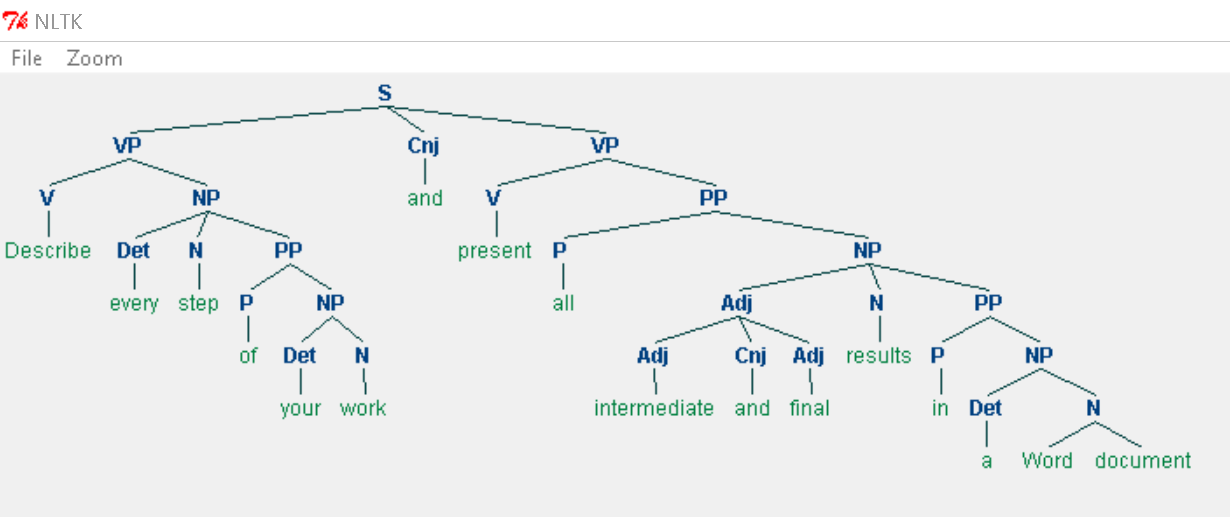

In [29]:
from IPython.display import Image
Image("sentence_tree.png")